<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/Stacked_Regressions_Top_4_on_LeaderBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [175]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [176]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [177]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [178]:
print("The train data size before dropping Id feature is: {}".format(train.shape))
print("The test data size befroe dropping Id feature is: {}".format(test.shape))

train_ID = train["Id"]
test_ID = test["Id"]

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id feature is: {}".format(train.shape))
print("The test data size aftter dropping Id feature is: {}".format(test.shape))

The train data size before dropping Id feature is: (1460, 81)
The test data size befroe dropping Id feature is: (1459, 80)

The train data size after dropping Id feature is: (1460, 80)
The test data size aftter dropping Id feature is: (1459, 79)


# Data Processing

## Outliers

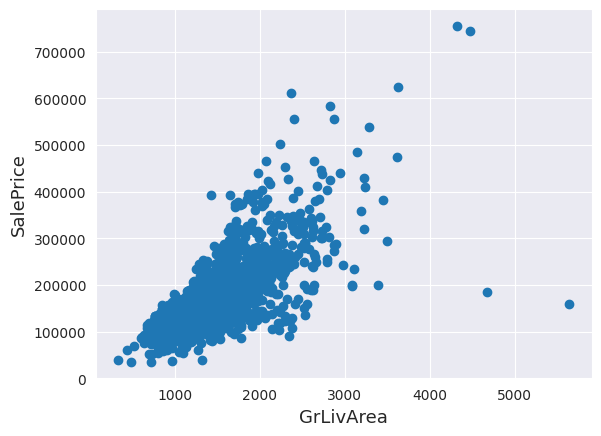

In [179]:
fig, ax = plt.subplots()
ax.scatter(x = train["GrLivArea"], y = train["SalePrice"])
plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("GrLivArea", fontsize = 13)
plt.show()

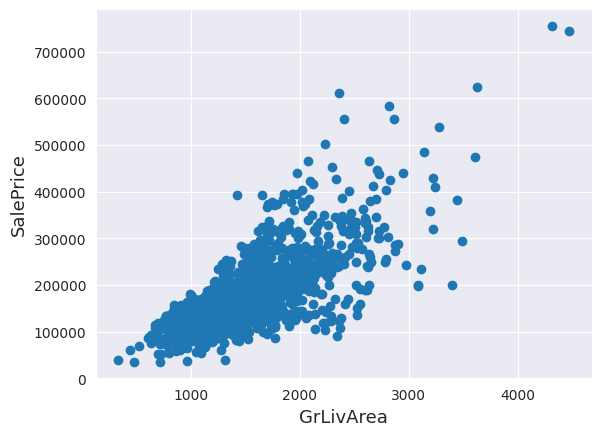

In [180]:
# Deleting Outliers
train = train.drop(train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 300000)].index)

fig, ax = plt.subplots()
ax.scatter(train["GrLivArea"], train["SalePrice"])
plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("GrLivArea", fontsize = 13)
plt.show()

## Target Variable


 mu = 180932.92 and sigma = 79467.79



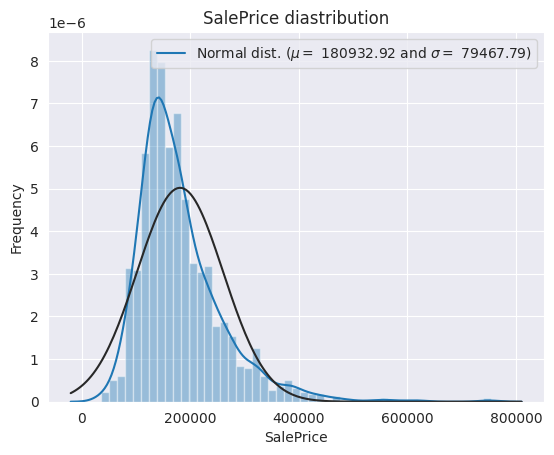

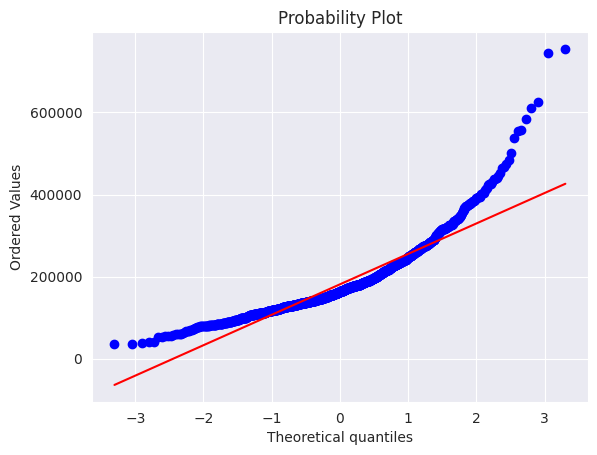

In [181]:
sns.distplot(train["SalePrice"], fit = norm);

(mu, sigma) = norm.fit(train["SalePrice"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

plt.legend(["Normal dist. ($\mu = $ {:.2f} and $\sigma = $ {:.2f})".
            format(mu, sigma)],
           loc = "best")
plt.ylabel("Frequency")
plt.title("SalePrice diastribution")

fig = plt.figure()
res = stats.probplot(train["SalePrice"], plot = plt)
plt.show()

### Log-transformation of the target value


 mu = 12.02 and sigma = 0.40



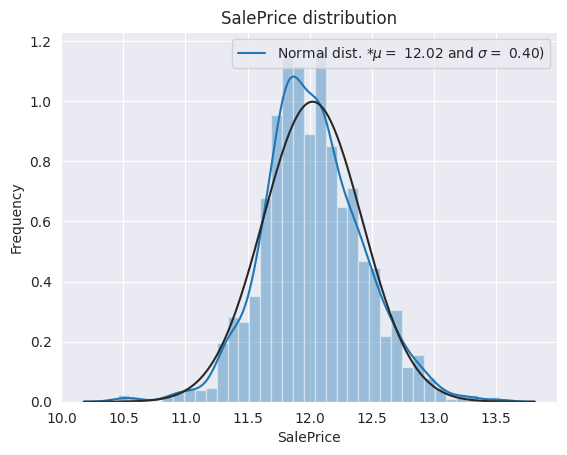

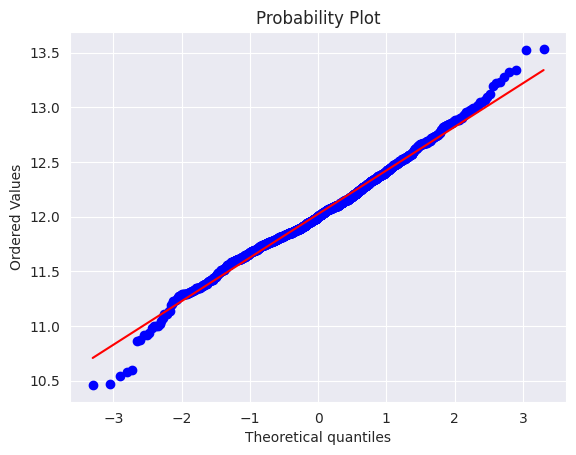

In [182]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train["SalePrice"], fit = norm);

(mu, sigma) = norm.fit(train["SalePrice"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

plt.legend(["Normal dist. *$\mu = $ {:.2f} and $\sigma = $ {:.2f})".format(mu, sigma)],
           loc = "best")
plt.ylabel("Frequency")
plt.title("SalePrice distribution")

fig = plt.figure()
res = stats.probplot(train["SalePrice"], plot = plt)
plt.show()

## Features engineering

In [183]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(["SalePrice"], axis = 1, inplace = True)
print("all_data size is: {}".format(all_data.shape))

all_data size is: (2917, 79)


### Missing Data

In [184]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({"Missing Ration": all_data_na})
missing_data.head(20)

,Missing Ration
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

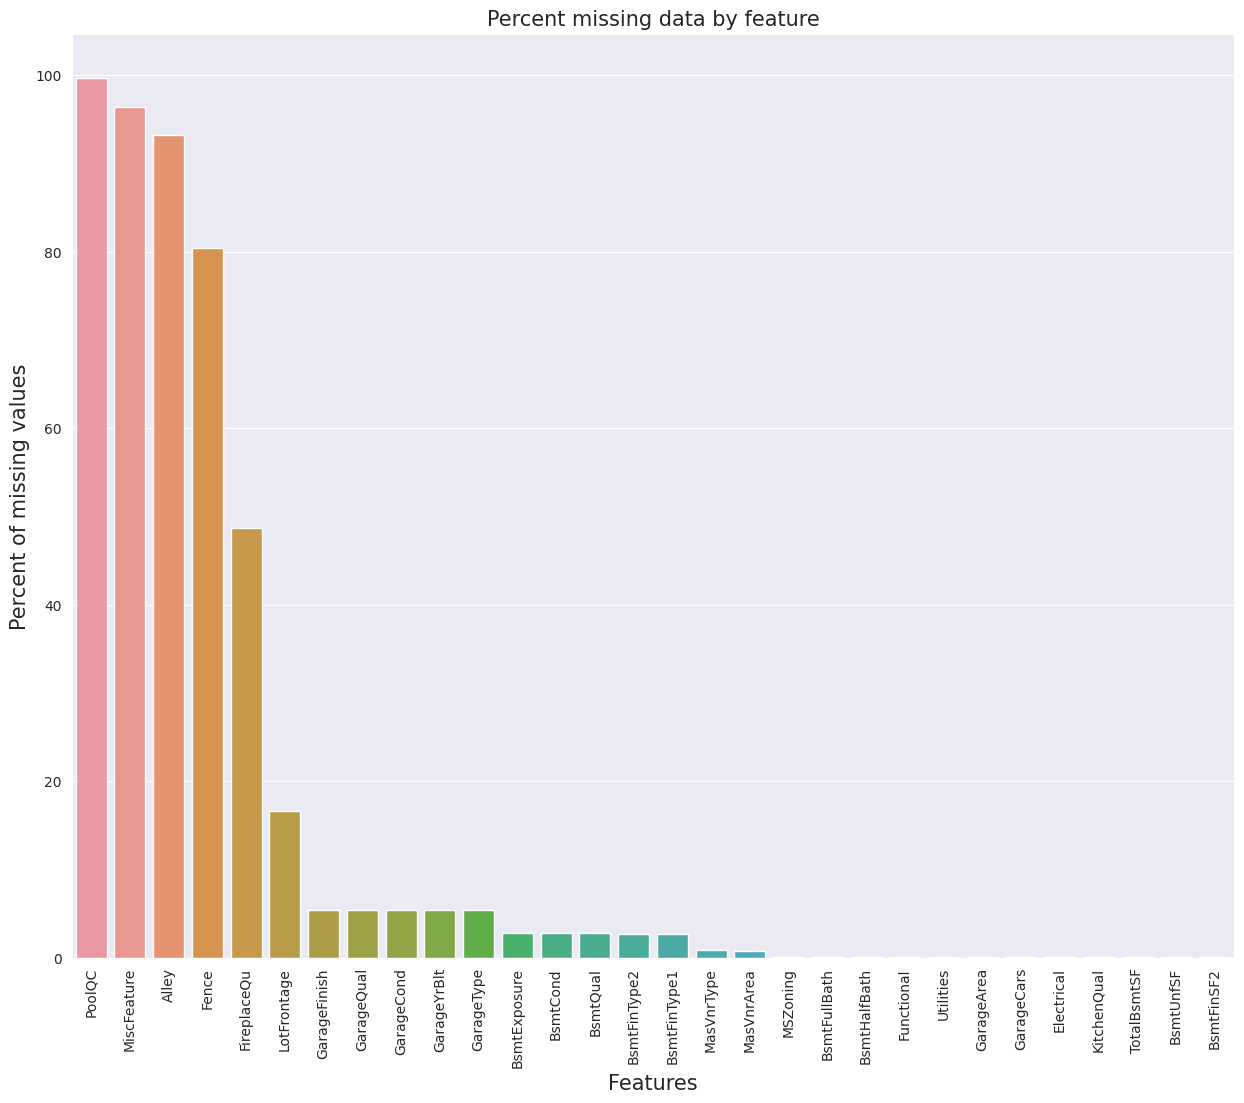

In [185]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = 90)
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel("Features", fontsize = 15)
plt.ylabel("Percent of missing values", fontsize = 15)
plt.title("Percent missing data by feature", fontsize = 15)

### Data Correlation

<Axes: >

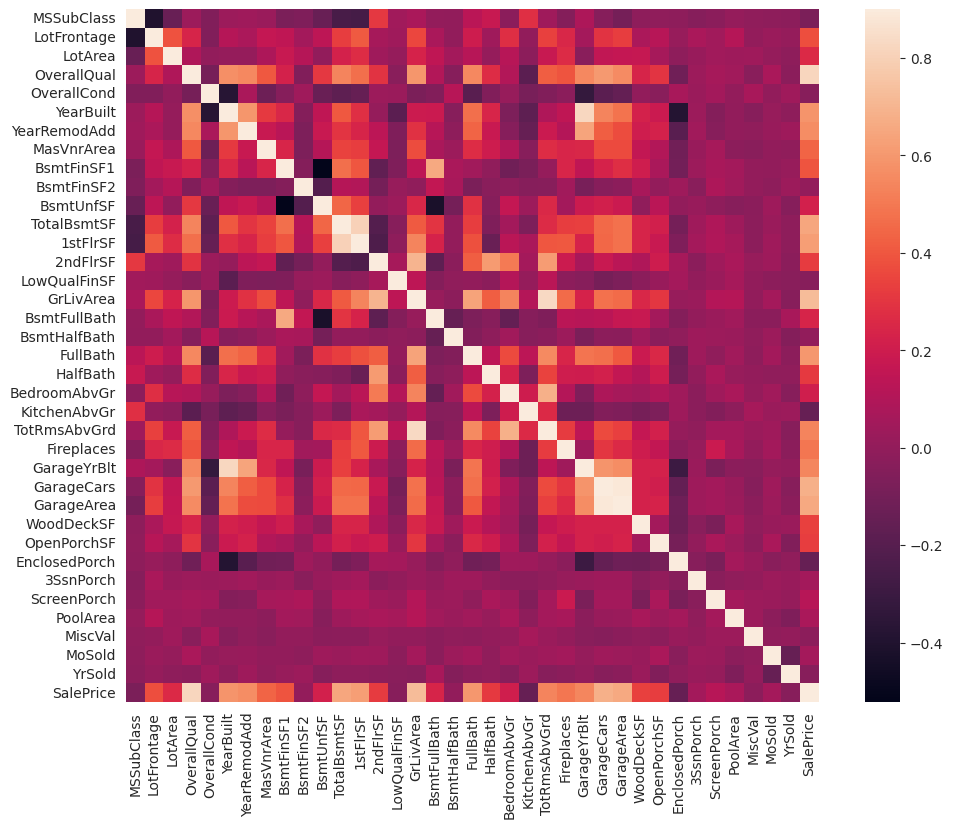

In [186]:
corrmat = train.corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.9, square = True)

### Imputing missing values

* PoolQC: data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [187]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

* MiscFeature: data description says NA means "no misc feature"

In [188]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

* Alley: data description says NA means "no alley access"

In [189]:
all_data["Alley"] = all_data["Alley"].fillna("None")

* Fence: data description says NA means "no fence"

In [190]:
all_data["Fence"] = all_data["Fence"].fillna("None")

* FireplaceQu: data description says NA means "no fireplace"

In [191]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

* LotFrontage: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood.**

In [192]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

* GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [193]:
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
  all_data[col] = all_data[col].fillna("None")

* GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [194]:
for col in ("GarageYrBlt", "GarageArea", "GarageCars"):
  all_data[col] = all_data[col].fillna(0)

* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [195]:
for col in ("BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"):
  all_data[col] = all_data[col].fillna(0)

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [196]:
for col in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
  all_data[col] = all_data[col].fillna("None")

* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [197]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

* MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [198]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])

* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [199]:
all_data = all_data.drop(["Utilities"], axis = 1)

* Functional : data description says NA means typical

In [200]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

* Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [201]:
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])

* KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [202]:
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])

* Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [203]:
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])

* SaleType : Fill in again with most frequent which is "WD"

In [204]:
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])

* MSSubClass : Na most likely means No building class. We can replace missing values with None

In [205]:
all_data["MSSubClass"] = all_data["MSSubClass"].fillna("None")

In [206]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({"Missing Ratio": all_data_na})
missing_data.head()

,Missing Ratio


### More featurs engeneering

* Transforming some numerical variables that are really categorical

In [207]:
all_data["MSSubClass"] = all_data["MSSubClass"].apply(str)

all_data["OverallCond"] = all_data["OverallCond"].astype(str)

all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["MoSold"] = all_data["MoSold"].astype(str)

* Label Encoding some categorical variables that may contain information in their ordering set

In [208]:
from sklearn.preprocessing import LabelEncoder
cols = ("FireplaceQu", "BsmtQual", "BsmtCond", "GarageQual", "GarageCond", "ExterQual",
        "ExterCond", "HeatingQC", "PoolQC", "KitchenQual", "BsmtFinType1", "BsmtFinType2",
        "Functional", "Fence", "BsmtExposure", "GarageFinish", "LandSlope", "LotShape",
        "PavedDrive", "Street", "Alley", "CentralAir", "MSSubClass", "OverallCond",
        "YrSold", "MoSold")

for c in cols:
  lbl = LabelEncoder()
  lbl.fit(list(all_data[c].values))
  all_data[c] = lbl.transform(list(all_data[c].values))

print("Shape_all_data: {}".format(all_data.shape))

Shape_all_data: (2917, 78)


* Adding one more important feature

In [209]:
all_data["TotalSF"] = all_data["TotalBsmtSF"] + all_data["1stFlrSF"] + all_data["2ndFlrSF"]

* Skewed feature

In [210]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({"Skew": skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


* Box Cox Trnasformation of (highly) skewed features

In [211]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
  # all_data[feat] += 1
  all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


* Getting cummy categorical features

In [212]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [213]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modeling

* Immport libraries

In [214]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

* Define a corss validation strategy

In [215]:
n_folds = 5

def rmsle_cv(model):
  kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
  rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring = "neg_mean_squared_error", cv = kf))
  return(rmse)

## Base models
* LASSO Regression

In [216]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

* Elastic Net Regression

In [217]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = 0.9,
                                                random_state = 3))

* Kernel Ridge Regression

In [218]:
KRR = KernelRidge(alpha = 0.6, kernel = "polynomial", degree = 2, coef0 = 2.5)

* Gradient Boosting Regression

In [219]:
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = "sqrt",
                                   min_samples_leaf = 15, min_samples_split = 10,
                                   loss = "huber", random_state = 5)

* XGBoost

In [220]:
model_xgb = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468,
                             learning_rate = 0.05, max_depth = 3,
                             min_child_weight = 1.7817, n_estimators = 2200,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             random_state = 7, nthread = -1)

* LightGBM

In [221]:
model_lgb = lgb.LGBMRegressor(objective = "regression", num_leaves = 5,
                              learning_rate = 0.05, n_estimators = 720,
                              max_bin = 55,bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

### Base models scores

In [222]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [223]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [224]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [225]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1167 (0.0083)



In [226]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[06:08:45] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[06:08:51] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[06:08:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[06:09:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[06:09:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 0.1172 (0.0050)



In [227]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

## Stacking models

### Simplest Stacking approach: Averaging base models

* Averaged base models class

In [228]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

* Averaged base models score

In [229]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



### Less simple Stacking: Adding a Meta-model
* Stacking averaged Models Class

In [230]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
          for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    #Do the predictions of all base models on the test data and use the averaged predictions as
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

* Stacking Averaged models Score

In [231]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0073)


## Ensmebling StackedRegressor, XGBoost and LightGBM

In [232]:
def rmsle(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction
* StackedRegressor

In [233]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07839506096665937


* XGBoost

In [234]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[06:14:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.0790460201201611


* LightGBM

In [235]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23

In [236]:
'''RMSE on the entire Train data when averaging'''

print("RMSLE score on train data: ")
print(rmsle(y_train, stacked_train_pred * 0.7 + xgb_train_pred * 0.15 + lgb_train_pred * 0.15))

RMSLE score on train data: 
0.07548697935004024


* Ensemble prediction

In [237]:
ensemble = stacked_pred * 0.7 + xgb_pred * 0.15 + lgb_pred * 0.15

* Submission

In [238]:
sub = pd.DataFrame()
sub["Id"] = test_ID
sub["SalePrice"] = ensemble
sub.to_csv("submission.csv", index = False)